In [42]:
#step 1: Import the required modules
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import numpy as np
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import *
from sklearn.model_selection import GridSearchCV
import seaborn as sn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pickle

In [43]:
#step 2: importing in my dataset from my directory
datasetpre = pd.read_csv(r"C:\Users\Russell\Desktop\SmartParkingApp\PL80_Dataset_1.csv")

dataset = datasetpre.sample(frac=1)

In [44]:
#step 3: Creating X values

X = dataset.iloc[:,2:8]

X.head()


,VEHICLETYPE,SESSIONSTART,SESSIONEND,TOTAL_CHARGE,DURATION,EFFECTIVE_CHARGE
6421,C,11/8/2021 19:44,11/8/2021 20:09,0.50,25,0.50
1036,C,9/10/2021 20:57,10/10/2021 12:07,0.00,910,0.00
8349,C,18/9/2021 0:27,18/9/2021 2:53,2.92,146,2.92
8773,C,26/9/2021 0:54,26/9/2021 13:34,12.88,760,12.88
11464,C,31/10/2021 0:15,31/10/2021 0:16,0.00,1,0.00


In [45]:
#step 4: Creating Y values
Y = dataset.iloc[:,9]

Y.head()

6421     0
1036     1
8349     0
8773     0
11464    0
Name: LABEL_TYPE, dtype: int64

In [46]:
#Creating label encoder
le = preprocessing.LabelEncoder()
X['VEHICLETYPE'] = le.fit_transform(X['VEHICLETYPE'])


X['SESSIONSTART'] = pd.to_datetime(X['SESSIONSTART'], format='%d/%m/%Y %H:%M', infer_datetime_format=True)
X['SESSIONEND'] = pd.to_datetime(X['SESSIONEND'], format='%d/%m/%Y %H:%M', infer_datetime_format=True)

X['SESSIONSTART'] = pd.to_datetime(X['SESSIONSTART']).map(pd.Timestamp.timestamp)
X['SESSIONEND'] = pd.to_datetime(X['SESSIONEND']).map(pd.Timestamp.timestamp)

X['SESSIONSTART'] = X['SESSIONSTART'] / 60
X['SESSIONEND'] = X['SESSIONEND'] / 60


X.head()

,VEHICLETYPE,SESSIONSTART,SESSIONEND,TOTAL_CHARGE,DURATION,EFFECTIVE_CHARGE
6421,0,27145184.0,27145209.0,0.50,25,0.50
1036,0,27230217.0,27231127.0,0.00,910,0.00
8349,0,27198747.0,27198893.0,2.92,146,2.92
8773,0,27210294.0,27211054.0,12.88,760,12.88
11464,0,27260655.0,27260656.0,0.00,1,0.00


In [47]:
#step 5: Split the data set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)


In [48]:
# log = LogisticRegression(C=3792.690190732246, max_iter=1400, penalty='l1',solver='liblinear')

log = make_pipeline(StandardScaler(), LogisticRegression(C=3792.690190732246, max_iter=1400, penalty='l1',
                   solver='liblinear'))
  

# param_grid = [
#     {'penalty':['l1', 'l2', 'elasticnet', 'none'],
#     'C' : np.logspace(-4,4,20),
#     'solver' : ['lbfgs', 'newton-cg','sag','saga', 'liblinear'],
#     'max_iter' :[100,400,1400,2500]
#     }
# ]

# clf = GridSearchCV(log, param_grid = param_grid, cv=5,verbose=True, n_jobs=-1, error_score=np.nan)

# best_clf = clf.fit(X_train, Y_train)

In [49]:
#best_clf.best_estimator_
#the best estimator returned was LogisticRegression(C=3792.690190732246, max_iter=1400, penalty='l1',solver='liblinear')

# bestscore = best_clf.score(X_train,Y_train)
# print(bestscore)

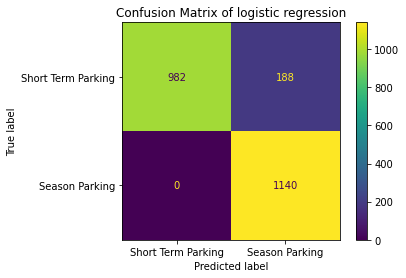

Accuracy: 0.918615
Precision: Short Term-1.0 Season-0.858434
Sensitivity: Short Term-0.839316 Season-1.0
F1 Score: Short Term-0.912639 Season-0.923825


In [50]:
#standardize the dataset
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

log.fit(X_train, Y_train)
y_pred = log.predict(X_test)
    
accuracy = metrics.accuracy_score(Y_test, y_pred)
precision = metrics.precision_score(Y_test, y_pred, average=None)
sensitivity = metrics.recall_score(Y_test, y_pred, average=None)
f1_score = metrics.f1_score(Y_test, y_pred, average=None)
    
#Displays confusion matrix
cm = metrics.confusion_matrix(Y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Short Term Parking','Season Parking'])
disp.plot()
plt.title('Confusion Matrix of logistic regression')
plt.show()
    
print("Accuracy: {0}".format(round(accuracy,6)))
print("Precision: Short Term-{0} Season-{1}".format(round(precision[0],6), round(precision[1], 6)))
print("Sensitivity: Short Term-{0} Season-{1}".format(round(sensitivity[0],6), round(sensitivity[1], 6)))
print("F1 Score: Short Term-{0} Season-{1}".format(round(f1_score[0],6), round(f1_score[1], 6)))
    

In [51]:
def kFoldCV_splits(model, X, y, cv=KFold(n_splits=10)): #cv must be at least a KFold object
    accuracy_list, precision_list, recall_list, f1_score_list = list(), list(), list(), list()
    
    X = pd.DataFrame(X)
    y = pd.Series(y)
    
    for train, test in cv.split(X, y):
        X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test] 
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        accuracy_list.append(metrics.accuracy_score(y_test, y_pred))
        precision_list.append(metrics.precision_score(y_test, y_pred, average=None))
        recall_list.append(metrics.recall_score(y_test, y_pred, average=None))
        f1_score_list.append(metrics.f1_score(y_test, y_pred, average=None))
        
    display_kfold_cv_results(accuracy_list, precision_list, recall_list, f1_score_list)
    
def display_kfold_cv_results(accuracy_list, precision_list, recall_list, f1_score_list):
    accuracy = np.mean(accuracy_list)
    precision_short, precision_season = np.mean([short for short, season in precision_list]), np.mean([season for short, season in precision_list])
    sensitivity_short, sensitivity_season = np.mean([short for short, season in recall_list]), np.mean([short for short, season in recall_list])
    f1_score_short, f1_score_season = np.mean([short for short, season in f1_score_list]), np.mean([short for short, season in f1_score_list])
    
    print("mean Accuracy: {0}".format(round(accuracy,6)))
    print("mean Precision: Short Term-{0} Season-{1}".format(round(precision_short,6), round(precision_season, 6)))
    print("mean Sensitivity: Short Term-{0} Season-{1}".format(round(sensitivity_short,6), round(sensitivity_season, 6)))
    print("mean F1 Score: Short Term-{0} Season-{1}".format(round(f1_score_short,6), round(f1_score_season, 6)))


In [52]:
kFoldCV_splits(log, X,Y)

mean Accuracy: 0.917389
mean Precision: Short Term-1.0 Season-0.859997
mean Sensitivity: Short Term-0.832498 Season-0.832498
mean F1 Score: Short Term-0.908514 Season-0.908514


In [54]:
import pickle
with open('logreg.pkl', 'wb') as f:
  pickle.dump(log,f)



model = pickle.load(open('logreg.pkl', 'rb'))

import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

#featureList = [0, 27249480.0, 27249481.0,  0.00, 1, 0]#seasonal prediction
featureList = [0, 27210294.0,	27211054.0,  12.88, 760, 12.88]#short term prediction

toNParray = np.asarray(featureList)
ReshapedArray = toNParray.reshape(1,-1)
model.predict(ReshapedArray)

The scikit-learn version is 1.1.1.


c:\Users\Russell\Anaconda3\envs\CondaApp\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)